# Prova codice tesi per regressione logistica

Per prima cosa iniziamo a importare un po' di pacchetti che ci servono.

In [1]:
from tqdm import tqdm

import numpy as np
np.random.seed(0)  # keep the random seed of numpy fixed

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Configure matplotlib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Vediamo di importare il codice che abbiamo usato a lezione per creare un controesempio. L'idea è quella di creare un dataset che contenga dati che non possono essere linearmente separati. Proviamo a usare ChatGPT per cercare un modello che non sia lineare (in teoria posso usare anche il make moons che avevamo nell'ultimo assignment).

In [2]:
from sklearn.datasets import make_circles

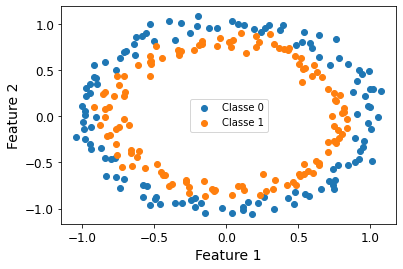

In [3]:
X, y = make_circles(n_samples=250, noise=0.05, random_state=42)

# Visualizzare il dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Classe 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Classe 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

A questo punto l'idea è di vedere come creando la regressione logistica questa non funzioni. L'idea sarebbe quella di dividere il nostro dataset in alcuni training data e alcuni validation data. Possiamo farlo tranquillamente.

In [4]:
logreg = LogisticRegression(penalty = None)

# Forse qua andrebbero scalate le cose con uno StandardScaler?

# Qua possiamo fittare i nostri dati
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
logreg.fit(X_train, y_train)

LogisticRegression(penalty=None)

A questo punto abbiamo fittato il nostro modello logistico: proviamo quindi a vedere come si comporta. Per iniziare settiamo il decision boundary a 0.5 come nel classificatore Bayesiano base.

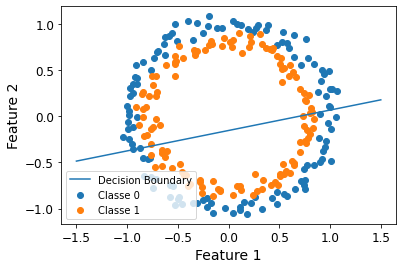

[[-0.06374919  0.28826603]]
[0.04427362]


In [5]:
# Mettiamo alpha il valore della soglia
alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(-1.5, 1.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg.intercept_[0] - logreg.coef_[0, 0]*z_x[:]) / (logreg.coef_[0,1])

plt.figure()
plt.plot(z_x, z_y, label = "Decision Boundary")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Classe 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Classe 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.show()

print(logreg.coef_)
print(logreg.intercept_)

Chiaramente dall'esempio sopra si vede che non funziona. In teoria dovrebbe funzionare se usassimo un kernel non lineare. Sarebbe magari da provare ad aggiustare (**provalo prima o poi magari devi aggiungere x^2 come predictor non dovrebbe essere impossibile**). Vediamo di provare a farlo.

In [6]:
def make_plot(X, y, model=None, title=None):
    _, ax = plt.subplots()  # we need `ax` for `DecisionBoundaryDisplay`
    
    if model is not None:
        common_params = {"estimator": model, "X": X, "ax": ax, "grid_resolution": 200, "eps": 0.2}
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,
        )
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="decision_function",
            plot_method="contour",
            levels=[-1, 0, 1],
            colors=["r", "r", "r"],
            linestyles=["--", "-", "--"],
        )
        
    if title is not None:
        ax.set_title(title)

    ax.scatter(X[:, 0], X[:, 1], c=y, s=35, edgecolor="k")
    ax.set_aspect('equal')
    
    plt.plot()

In [7]:
# Per prima cosa creo il valore x**2

X1 = np.insert(X, 2, 0, axis = 1)
X1 = np.insert(X1, 3, 0, axis = 1)
X1 = np.insert(X1, 4, 0, axis = 1)

# Nella terza metto x^2
X1[:, 2] = (X1[:, 0])**2

# Nella quarta metto y^2
X1[:, 3] = (X1[:, 1])**2

# Nella quinta metto xy
X1[:, 4] = (X1[:, 0])*(X1[:, 1])

#print(X1)

# A questo punto creo una regressione logistica su questi parametri
logreg1 = LogisticRegression(penalty = None)
logreg1.fit(X1, y)

# Ora proviamo a plottare il nuovo decision boundary
# L'idea è anche giusta ma non saprei come plottarlo su pyplot


LogisticRegression(penalty=None)

[[ -0.96173545   0.45914274 -53.31312505 -51.2595925    0.15551891]]
[42.45963872]


C:\Users\Daniele\AppData\Local\Temp\ipykernel_15188\2480064574.py:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, y1, equation, levels=[0], colors='r', label='DB with a = 0.3')
C:\Users\Daniele\AppData\Local\Temp\ipykernel_15188\2480064574.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, y1, equation, levels=[0], colors='g', label='DB with a = 0.8')


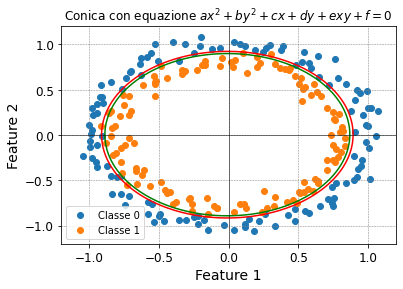

In [8]:
print(logreg1.coef_)
print(logreg1.intercept_)

# Cerco i coefficienti
a = logreg1.coef_[0,0]
b = logreg1.coef_[0,1]
c = logreg1.coef_[0,2]
d = logreg1.coef_[0,3]
e = logreg1.coef_[0,4]
f = logreg1.intercept_[0]

# Mettiamo alpha il valore della soglia

alpha = 0.3
log_a = np.log((alpha) /  (1 -alpha))


# Crea una griglia di punti
x1 = np.linspace(-1.2, 1.2, 400)
y1 = np.linspace(-1.2, 1.2, 400)
x1, y1 = np.meshgrid(x1, y1)

# Calcola l'equazione della conica
equation = a * x1 + b * y1 + c * x1**2 + d * y1**2 + e * x1 * y1 + f - log_a

# Disegna la conica
plt.contour(x1, y1, equation, levels=[0], colors='r', label='DB with a = 0.3')

# Cambiamo il valore di alpha
alpha = 0.8
log_a = np.log((alpha) /  (1 -alpha))

# Calcola l'equazione della conica
equation = a * x1 + b * y1 + c * x1**2 + d * y1**2 + e * x1 * y1 + f - log_a

# Disegna la conica
plt.contour(x1, y1, equation, levels=[0], colors='g', label='DB with a = 0.8')
#plt.legend()

# Imposta l'aspetto del grafico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conica con equazione $ax^2 + by^2 + cx + dy + exy + f = 0$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

#plt.figure()
#plt.plot(z_x, z_y, label = "Decision Boundary")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Classe 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Classe 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.legend()
plt.legend()
plt.show()


Possiamo provare con un altro dataset per vedere che non funziona, ad esempio con il two moon dell'assignment che ci hanno dato a Machine Learning a Utrecht.

In [9]:
from sklearn.datasets import make_moons

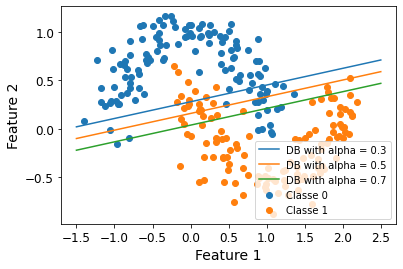

In [10]:
X_moon, y_moon = make_moons(n_samples=250, noise=0.15, random_state=0)

X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_moon, train_size = 0.7)
logreg_moon = LogisticRegression(penalty = None).fit(X_train_moon, y_train_moon)

plt.figure()

# Mettiamo alpha il valore della soglia
alpha = 0.3
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(-1.5, 2.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_moon.intercept_[0] - logreg_moon.coef_[0, 0]*z_x[:]) / (logreg_moon.coef_[0,1])
plt.plot(z_x, z_y, label = "DB with alpha = 0.3")

# Proviamo a scegliere un altro livello di soglia

alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(-1.5, 2.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_moon.intercept_[0] - logreg_moon.coef_[0, 0]*z_x[:]) / (logreg_moon.coef_[0,1])
plt.plot(z_x, z_y, label = "DB with alpha = 0.5")

# Proviamone un ultimo
alpha = 0.7
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(-1.5, 2.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_moon.intercept_[0] - logreg_moon.coef_[0, 0]*z_x[:]) / (logreg_moon.coef_[0,1])
plt.plot(z_x, z_y, label = "DB with alpha = 0.7")


# Ora plottiamo i vari grafici del dataset

plt.scatter(X_moon[y_moon == 0][:, 0], X_moon[y_moon == 0][:, 1], label="Classe 0")
plt.scatter(X_moon[y_moon == 1][:, 0], X_moon[y_moon == 1][:, 1], label="Classe 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.show()

C:\Users\Daniele\AppData\Local\Temp\ipykernel_15188\3439562259.py:36: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, equation, levels=[0], colors='r', label='Conica')


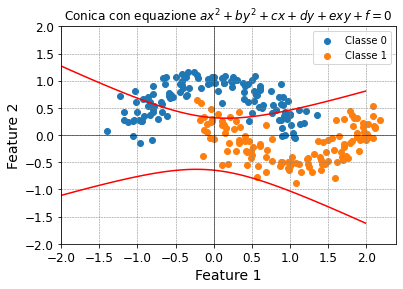

In [11]:
# Aggiungiamo anche qua le colonne con i quadrati

X1_moon = np.insert(X_moon, 2, 0, axis = 1)
X1_moon = np.insert(X1_moon, 3, 0, axis = 1)
X1_moon = np.insert(X1_moon, 4, 0, axis = 1)

# Nella terza metto x^2
X1_moon[:, 2] = (X1_moon[:, 0])**2

# Nella quarta metto y^2
X1_moon[:, 3] = (X1_moon[:, 1])**2

# Nella quinta metto xy
X1_moon[:, 4] = (X1_moon[:, 0])*(X1_moon[:, 1])

# Ora fitto il nuovo metodo
logreg_moon1 = LogisticRegression(penalty = None).fit(X1_moon, y_moon)

# Coefficienti dell'equazione ax^2 + by^2 + cx + dy + exy + f = 0
a = logreg_moon1.coef_[0,0]
b = logreg_moon1.coef_[0,1]
c = logreg_moon1.coef_[0,2]
d = logreg_moon1.coef_[0,3]
e = logreg_moon1.coef_[0,4]
f = logreg_moon1.intercept_[0]

# Crea una griglia di punti
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)

# Calcola l'equazione della conica
equation = a * x**2 + b * y**2 + c * x + d * y + e * x * y + f

# Disegna la conica
plt.contour(x, y, equation, levels=[0], colors='r', label='Conica')

# Imposta l'aspetto del grafico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conica con equazione $ax^2 + by^2 + cx + dy + exy + f = 0$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.scatter(X_moon[y_moon == 0][:, 0], X_moon[y_moon == 0][:, 1], label="Classe 0")
plt.scatter(X_moon[y_moon == 1][:, 0], X_moon[y_moon == 1][:, 1], label="Classe 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In questo caso non pare funzionare molto bene la cosa.

C:\Users\Daniele\AppData\Local\Temp\ipykernel_15188\899045039.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, equation, levels=[0], colors='r', label='Conica')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


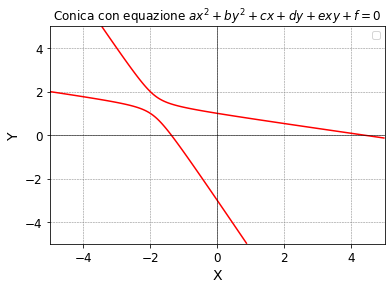

In [12]:
# Coefficienti dell'equazione ax^2 + by^2 + cx + dy + exy + f = 0
a, b, c, d, e, f = 1, 2, -3, 4, 5, -6

# Crea una griglia di punti
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

# Calcola l'equazione della conica
equation = a * x**2 + b * y**2 + c * x + d * y + e * x * y + f

# Disegna la conica
plt.contour(x, y, equation, levels=[0], colors='r', label='Conica')

# Imposta l'aspetto del grafico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conica con equazione $ax^2 + by^2 + cx + dy + exy + f = 0$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# Prova codice mio regressione logistica
Vediamo ora di provare a implementare un mio codice usando quello proposto da ESL.

In [13]:
def LogisticRegressionMia(data, labels, n_iter = 100):
    
    # Proviamo a stampare il tempo
    # Prendiamo il tempo iniziale
    
    t0 = time()
    
    # Inizialmente proviamo a fissare beta = 0
    beta = np.zeros(len(data[0, :]))
    #print(beta)
    
    # Poi dobbiamo creare il vettore di fitted probabilities p
    p = np.ones(len(labels))
    diagonale = np.zeros(len(labels))
    
    # Ora dobbiamo ripetere queste operazione
    for n in range(n_iter):
        
        # Usiamo i cicli for e poi vediamo di passare allo slicing
        for i in range(len(labels)):
            h = beta @ data[i, :]
            elemento = ((np.e)**h) / (1+(np.e)**h)
            #print(elemento)
            #print(np.e**h / (1+np.e**h))
            p[i] = elemento
            #print(p[i])
            diagonale[i] = p[i]*(1 - p[i])
        
        #diagonale[:] = p[:]*(1 - p[:])
            
        #print(p)

        # Ora creiamo la matrice W: questa è una prima implementazione grezza,
        # vedi coem creare le matrici diagonali
        W = np.diagflat(diagonale)
        #print(W)

        # A questo punto definisco il vettore z
        W_inv = np.linalg.inv(W)
        z = np.dot(data, beta) + np.dot(W_inv, labels-p)

        # Ora calcolo il nuovo b
        a = np.dot(data.T, W)
        c = np.dot(a, data)
        d = np.linalg.inv(c)
        f = np.dot(data.T, W)
        g = np.dot(d, f)
        beta = np.dot(g, z)
    
    print(f"Regressione effettuata in: {time() - t0} s.")
        
    return beta

In [14]:
def LogisticRegressionMia2(data, labels, n_iter = 1000, tol = 1e-7):
    
    # Proviamo a stampare il tempo
    # Prendiamo il tempo iniziale
    
    t0 = time()
    
    # Inizialmente proviamo a fissare beta = 0
    beta = np.zeros(len(data[0, :]))
    beta_store = [0]
    #print(beta)
    
    # Poi dobbiamo creare il vettore di fitted probabilities p
    p = np.ones(len(labels))
    diagonale = np.zeros(len(labels))
    
    # Ora dobbiamo ripetere queste operazione
    for n in range(n_iter):
        
        # Usiamo i cicli for e poi vediamo di passare allo slicing
        for i in range(len(labels)):
            h = beta @ data[i, :]
            elemento = ((np.e)**h) / (1+(np.e)**h)
            #print(elemento)
            #print(np.e**h / (1+np.e**h))
            p[i] = elemento
            #print(p[i])
            diagonale[i] = p[i]*(1 - p[i])
        
        #diagonale[:] = p[:]*(1 - p[:])
            
        #print(p)

        # Ora creiamo la matrice W: questa è una prima implementazione grezza,
        # vedi coem creare le matrici diagonali
        W = np.diagflat(diagonale)
        #print(W)

        # A questo punto definisco il vettore z
        W_inv = np.linalg.inv(W)
        z = np.dot(data, beta) + np.dot(W_inv, labels-p)

        # Ora calcolo il nuovo b
        a = np.dot(data.T, W)
        c = np.dot(a, data)
        d = np.linalg.inv(c)
        f = np.dot(data.T, W)
        g = np.dot(d, f)
        beta = np.dot(g, z)
        
        beta_store.append(beta)
        
        if (np.linalg.norm(beta_store[-1] - beta_store[-2]) < tol):
            break
    
    print(f"Regressione effettuata in: {time() - t0} s.")
        
    return beta

In [15]:
# Proviamo a fittare e a vedere cosa esce

# Usiamo il primo dataset quello dei cerchi
X, y = make_circles(n_samples=100, noise=0.05, random_state=42)

X2 = np.insert(X, 0, 1, axis = 1)
#print(X2)
beta = LogisticRegressionMia(data = X2, labels = y, n_iter = 10000)
print(beta)

beta_tol = LogisticRegressionMia2(data = X2, labels = y, n_iter = 10000)
print(beta_tol)

Regressione effettuata in: 9.626188516616821 s.
[-2.06441571e-05  1.80025682e-02  1.13186825e-02]
Regressione effettuata in: 0.0017249584197998047 s.
[-2.06441571e-05  1.80025682e-02  1.13186825e-02]


Non vorrei che fosse un problema legato al fatto che in teoria non funziona bene con questo dataset. Non è che magari è da provare un altro dataset su cui funziona effettivamente la logistic regression? Prova a cercarne uno più tardi.

In [16]:
# Proviamo con il due moon dataset
X_moon, y_moon = make_moons(n_samples=250, noise=0.15, random_state=0)

X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_moon, train_size = 0.7)
logreg.fit(X_train_moon, y_train_moon)

X3 = np.insert(X_moon, 0, 1, axis = 1)
beta3 = LogisticRegressionMia2(X3, y_moon, n_iter = 5000)
print(beta3)

print(logreg.coef_)
print(logreg.intercept_)

Regressione effettuata in: 0.03614306449890137 s.
[ 1.00408222  0.99747851 -5.91009164]
[[ 0.79438489 -6.7725077 ]]
[1.43795982]


Tutto sommato non esce male come risultato, è solo un po' lento. Aumentando il numero di iterazioni migliora, ma è veramente molto lento.

In [17]:
from sklearn import datasets

iris = datasets.load_iris()
#print(iris.DESCR)
X_iris, y_iris = iris.data, iris.target

In [18]:
# Prendiamo solo due categorie

X_iris1 = iris["data"][:, (2, 3)]  # petal length, petal width
y_iris1 = (iris["target"] == 2).astype(int)  # make problem binary: 1 if Iris virginica, else 0
print(y_iris1)

X4 = np.insert(X_iris1, 0, 1, axis = 1)
#print(X4)
beta4 = LogisticRegressionMia2(X4, y_iris1, n_iter = 30000)
print(beta4)

logreg_iris = LogisticRegression().fit(X_iris1, y_iris1)
print(logreg_iris.coef_)
print(logreg_iris.intercept_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Regressione effettuata in: 0.02552628517150879 s.
[-45.27234377   5.75453232  10.44669989]
[[2.77762524 2.38552012]]
[-17.5481106]


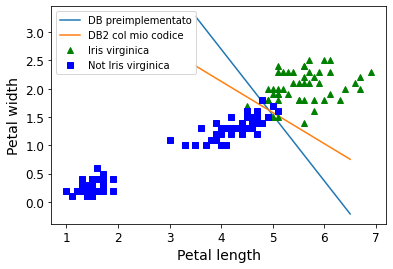

In [19]:
alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(3.5, 6.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_iris.intercept_[0] - logreg_iris.coef_[0, 0]*z_x[:]) / (logreg_iris.coef_[0,1])

z_y1  = (log_a - beta4[0] - beta4[1]*z_x[:]) / beta4[2]


plt.figure()
plt.plot(z_x, z_y, label = "DB preimplementato")
plt.plot(z_x, z_y1, label = "DB2 col mio codice")
plt.plot(X_iris1[:, 0][y_iris1 == 1], X_iris1[:, 1][y_iris1 == 1], "g^", label="Iris virginica")
plt.plot(X_iris1[:, 0][y_iris1 == 0], X_iris1[:, 1][y_iris1 == 0], "bs", label="Not Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.show()

Il piano non coincide più di tanto, ma alla fine qualcosa di ragionevole si vede (sembrano abbastanza simili).

In [20]:
from sklearn.datasets import load_wine
wine = load_wine()

In [21]:
wine_usare = wine["target"]
wine_x = wine["data"][:, (3, 4)]
#wine_x_usare = wine_x[]

In [22]:
#print(wine_x)

In [23]:
wine_usare1 = (wine_usare == 0).astype(int)

In [24]:
#wine_usare1

In [25]:
X_wine = np.insert(wine_x, 0, 1, axis = 1)
beta5 = LogisticRegressionMia2(X_wine, wine_usare1, n_iter = 10000)
print(beta5)

logreg_wine = LogisticRegression().fit(wine_x, wine_usare1)
print(logreg_wine.coef_)
print(logreg_wine.intercept_)

Regressione effettuata in: 0.03652477264404297 s.
[ 2.75956313 -0.50248291  0.05929248]
[[-0.4985305   0.05918656]]
[2.69763764]


Proviamo ora a verificare graficamente siano separabili tramite un iperpiano non vorrei fosse questo a creare problemi.

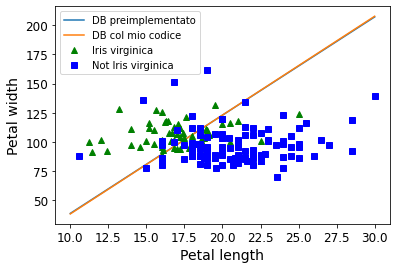

In [26]:
alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(10, 30, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_wine.intercept_[0] - logreg_wine.coef_[0, 0]*z_x[:]) / (logreg_wine.coef_[0,1])

z_y1  = (log_a - beta5[0] - beta5[1]*z_x[:]) / beta5[2]

plt.figure()
plt.plot(z_x, z_y, label = "DB preimplementato")
plt.plot(z_x, z_y1, label = "DB col mio codice")
plt.plot(wine_x[:, 0][wine_usare1 == 1], wine_x[:, 1][wine_usare1 == 1], "g^", label="Iris virginica")
plt.plot(wine_x[:, 0][wine_usare1 == 0], wine_x[:, 1][wine_usare1 == 0], "bs", label="Not Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.show()

Direi che sembrano molto simili i due piani, sono quasi lo stesso. L'unica cosa il metodo lineare non funziona molto bene in questo caso.

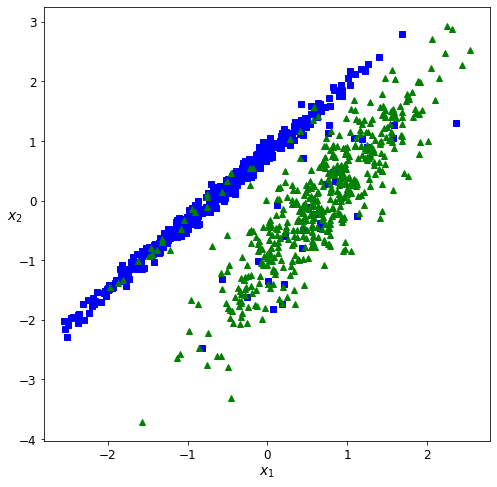

In [27]:
X_cluster, y_cluster = datasets.make_classification(n_samples=1000,
                                                    n_features=2,
                                                    n_redundant=0,
                                                    n_informative=2,
                                                    n_repeated=0,
                                                    n_clusters_per_class=1,
                                                    flip_y=0.1,
                                                    random_state=15,
                                                    )
# scale the data
scaler = StandardScaler()
X_cluster = scaler.fit_transform(X_cluster)

plt.figure(figsize=(8, 8))
plt.plot(X_cluster[:, 0][y_cluster == 0], X_cluster[:, 1][y_cluster == 0], "bs")
plt.plot(X_cluster[:, 0][y_cluster == 1], X_cluster[:, 1][y_cluster == 1], "g^")
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
plt.show()

In [28]:
# Proviamo la logistic regression su questi dati

X_cluster1 = np.insert(X_cluster, 0, 1, axis = 1)
beta6 = LogisticRegressionMia2(X_cluster1, y_cluster, n_iter = 100)
print(beta6)

logreg_cluster = LogisticRegression().fit(X_cluster, y_cluster)
print(logreg_cluster.coef_)
print(logreg_cluster.intercept_)

Regressione effettuata in: 0.7619006633758545 s.
[ 0.2731646   3.9522515  -2.83743259]
[[ 3.7184469  -2.63133812]]
[0.22432794]


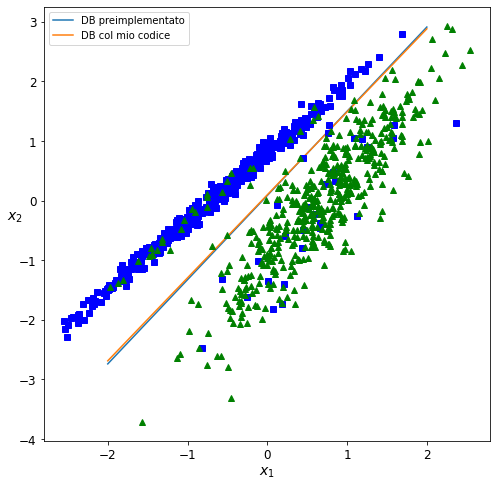

In [29]:
alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(-2, 2, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_cluster.intercept_[0] - logreg_cluster.coef_[0, 0]*z_x[:]) / (logreg_cluster.coef_[0,1])

z_y1  = (log_a - beta6[0] - beta6[1]*z_x[:]) / beta6[2]

plt.figure(figsize=(8, 8))
plt.plot(z_x, z_y, label = "DB preimplementato")
plt.plot(z_x, z_y1, label = "DB col mio codice")
plt.plot(X_cluster[:, 0][y_cluster == 0], X_cluster[:, 1][y_cluster == 0], "bs")
plt.plot(X_cluster[:, 0][y_cluster == 1], X_cluster[:, 1][y_cluster == 1], "g^")
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
plt.legend(loc = 'best', fontsize = 10)
plt.show()

Direi quasi ottimo qua, molto bene. Vedi un po' come funziona la funzione make_classification sopra (studiane i parametri).

## Prova con QDA ed LDA
Proviamo ad eseguire il codice con QDA e LDA. All'inizio lavoriamo in modo grezzo al tutto. Importiamo per prima cosa le librerie necessarie a fare il tutto. Lavoriamo con Gaussian Naive Bayes ad esempio. Proviamo a implementarlo su qualche dataset che abbiamo utilizzato finora, poi ne cercheremo di migliori.

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.naive_bayes import GaussianNB as GNB

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, train_size = 0.7)
#print(y_train)
#print(y_cluster)
LDA_cluster = LDA().fit(X_train, y_train)
QDA_cluster = QDA().fit(X_train, y_train)
NB_cluster = GNB().fit(X_train, y_train)
LR_cluster = LogisticRegression(penalty=None).fit(X_train, y_train)

In [32]:
y_pred_lda = LDA_cluster.predict(X_test)
y_pred_qda = QDA_cluster.predict(X_test)
y_pred_nb = NB_cluster.predict(X_test)
y_pred_lr = LR_cluster.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_pred_lda)

0.93

In [35]:
accuracy_score(y_test, y_pred_qda)

0.9366666666666666

In [36]:
accuracy_score(y_test, y_pred_nb)

0.7933333333333333

In [37]:
accuracy_score(y_test, y_pred_lr)

0.9333333333333333

Funziona malino il naive Bayes in questo caso.

Proviamo ora un altro dataset, tipo le due lune. Però aumentiamo il numero di osservazioni.

In [38]:
X_moon, y_moon = make_moons(n_samples=1000, noise=0.15, random_state=0)

X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_cluster, y_cluster, train_size = 0.7)
#print(y_train)
#print(y_cluster)
LDA_moon = LDA().fit(X_train_moon, y_train_moon)
QDA_moon = QDA().fit(X_train_moon, y_train_moon)
NB_moon = GNB().fit(X_train_moon, y_train_moon)
LR_moon = LogisticRegression(penalty=None).fit(X_train_moon, y_train_moon)

y_moon_lda = LDA_moon.predict(X_test_moon)
y_moon_qda = QDA_moon.predict(X_test_moon)
y_moon_nb = NB_moon.predict(X_test_moon)
y_moon_lr = LR_moon.predict(X_test_moon)

In [39]:
print(accuracy_score(y_test_moon, y_moon_lda))
print(accuracy_score(y_test_moon, y_moon_qda))
print(accuracy_score(y_test_moon, y_moon_nb))
print(accuracy_score(y_test_moon, y_moon_lr))

0.91
0.9133333333333333
0.7533333333333333
0.9133333333333333


## Prova con diversi risolutori per la Logistic Regression
In teoria io ho implementato un codice per la logistic regression che utilizza il metodo di Newton: forse è il caso di utilizzare una Logistic regression che usi il metodo di Newton. Ora ce ne sono due, quindi direi di provare entrambi.

In [40]:
# Dataset moon
logreg_newton_moon = LogisticRegression(penalty = 'l2', 
                                        solver = 'newton-cholesky').fit(X_train_moon, y_train_moon)

print(beta3)

print(logreg.coef_)
print(logreg.intercept_)

print(logreg_newton_moon.coef_)
print(logreg_newton_moon.intercept_)

[ 1.00408222  0.99747851 -5.91009164]
[[ 0.79438489 -6.7725077 ]]
[1.43795982]
[[ 3.84367636 -2.59582192]]
[0.19611473]


In [41]:
# Dataset Iris

# Prendiamo solo due categorie

print(beta4)

logreg_newton_iris = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_iris1, y_iris1)
print(logreg_iris.coef_)
print(logreg_iris.intercept_)

print(logreg_newton_iris.coef_)
print(logreg_newton_iris.intercept_)

[-45.27234377   5.75453232  10.44669989]
[[2.77762524 2.38552012]]
[-17.5481106]
[[ 5.75399054 10.44602888]]
[-45.26856866]


A quanto pare avevo sbagliato io a prendere i parametri della regressione logistica prima. Effettivamente escono gli stessi (almeno a tre cifre significative).

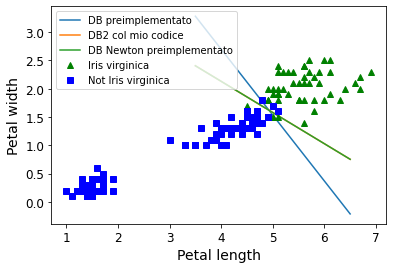

In [42]:
alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(3.5, 6.5, 1000)
z_y = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_iris.intercept_[0] - logreg_iris.coef_[0, 0]*z_x[:]) / (logreg_iris.coef_[0,1])

z_y1  = (log_a - beta4[0] - beta4[1]*z_x[:]) / beta4[2]

z_y2 = (log_a - logreg_newton_iris.intercept_[0] - logreg_newton_iris.coef_[0, 0]*z_x[:]) / (logreg_newton_iris.coef_[0,1])


plt.figure()
plt.plot(z_x, z_y, label = "DB preimplementato")
plt.plot(z_x, z_y1, label = "DB2 col mio codice")
plt.plot(z_x, z_y2, label = "DB Newton preimplementato")
plt.plot(X_iris1[:, 0][y_iris1 == 1], X_iris1[:, 1][y_iris1 == 1], "g^", label="Iris virginica")
plt.plot(X_iris1[:, 0][y_iris1 == 0], X_iris1[:, 1][y_iris1 == 0], "bs", label="Not Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.show()

In [43]:
# Dataset cluster

print(beta6)

logreg_newton_cluster = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_cluster, y_cluster)
print(logreg_cluster.coef_)
print(logreg_cluster.intercept_)

print(logreg_newton_cluster.coef_)
print(logreg_newton_cluster.intercept_)

[ 0.2731646   3.9522515  -2.83743259]
[[ 3.7184469  -2.63133812]]
[0.22432794]
[[ 3.95223907 -2.83741982]]
[0.27315713]


Anche qua il risultato è molto buono, magari potresti controllare i tempi.

In [44]:
# Dataset wine

print(beta5)

logreg_newton_wine = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(wine_x, wine_usare1)
print(logreg_wine.coef_)
print(logreg_wine.intercept_)

t0 = time()
print(logreg_newton_wine.coef_)
print(logreg_newton_wine.intercept_)
print(f"vectorization done in {time() - t0:.3f} s")

[ 2.75956313 -0.50248291  0.05929248]
[[-0.4985305   0.05918656]]
[2.69763764]
[[-0.50248287  0.05929248]]
[2.75956269]
vectorization done in 0.001 s


In [45]:
time()

1713693180.004152

## Prove per classificatore bayesiano nella tesi

In [46]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

In [47]:
y_cancer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

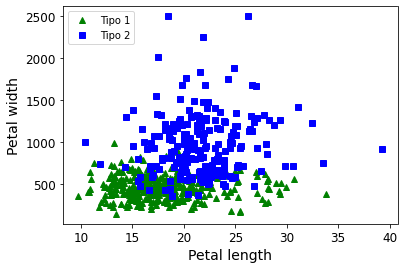

In [48]:
plt.figure()
# plt.plot(z_x, z_y, label = "DB preimplementato")
# plt.plot(z_x, z_y1, label = "DB2 col mio codice")
# plt.plot(z_x, z_y2, label = "DB Newton preimplementato")
p = 1
q = 3
plt.plot(X_cancer[:, p][y_cancer == 1], X_cancer[:, q][y_cancer == 1], "g^", label="Tipo 1")
plt.plot(X_cancer[:, p][y_cancer == 0], X_cancer[:, q][y_cancer == 0], "bs", label="Tipo 2")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.show()

In [49]:
X_cancer1 = X_cancer[:, (1, 2, 3, 4, 5)]

logreg_cancer = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_cancer1, y_cancer)

In [50]:
y_pred_cancer = logreg_cancer.predict(X_cancer1)

In [51]:
print(accuracy_score(y_pred_cancer, y_cancer))

0.9349736379613357


In [52]:
from sklearn.metrics import confusion_matrix

matrix_cancer = confusion_matrix(y_pred_cancer, y_cancer)
print(matrix_cancer)

[[189  14]
 [ 23 343]]


In [53]:
prob_cancer = logreg_cancer.predict_proba(X_cancer1)
# print(prob_cancer)
soglia = 0.3
y_pred_soglia = np.zeros_like(y_cancer)
for i in range(len(y_cancer)):
    if prob_cancer[i, 1] > soglia:
        y_pred_soglia[i] = 1

#print(y_pred_soglia)
#print(y_cancer)

matrix_cancer = confusion_matrix(y_pred_soglia, y_cancer)
print(matrix_cancer)

[[178   8]
 [ 34 349]]


## Scelta dataset per lavorare su QDA ed LDA
Proviamo a vedere se c'è qualche dataset su cui lavorare per QDA ed LDA. Dovremmo cercarne uno che coinvolga una distribuzione normale. Secondo me potremmo usare un dataset generato.

Accuratezza della logistic regression: 0.9433333333333334


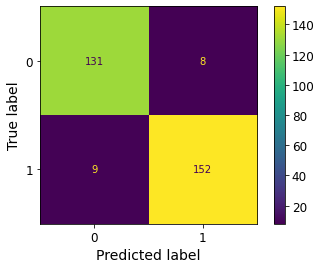

Accuratezza della LDA: 0.9433333333333334


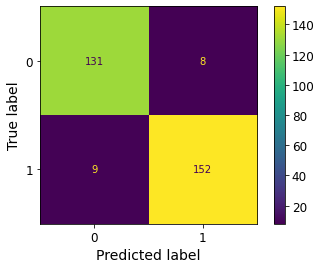

Accuratezza della QDA: 0.94


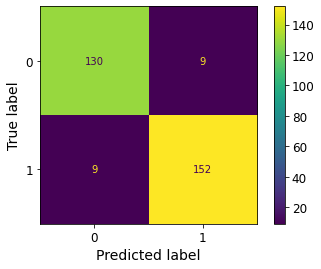

Accuratezza del Naive Bayes: 0.7833333333333333


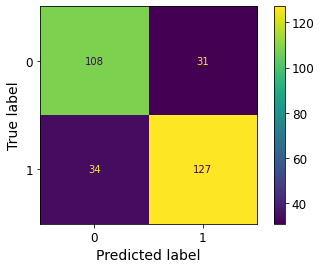

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, train_size = 0.7)
#print(y_train)
#print(y_cluster)
LDA_cluster = LDA().fit(X_train, y_train)
QDA_cluster = QDA().fit(X_train, y_train)
NB_cluster = GNB().fit(X_train, y_train)
LR_cluster = LogisticRegression(penalty=None).fit(X_train, y_train)

y_pred_lda = LDA_cluster.predict(X_test)
y_pred_qda = QDA_cluster.predict(X_test)
y_pred_nb = NB_cluster.predict(X_test)
y_pred_lr = LR_cluster.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lda = accuracy_score(y_test, y_pred_lda)
acc_qda = accuracy_score(y_test, y_pred_qda)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"Accuratezza della logistic regression: {acc_lr}")

matrix_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix = matrix_lr).plot()
plt.show()

print(f"Accuratezza della LDA: {acc_lda}")

matrix_lda = confusion_matrix(y_test, y_pred_lda)
ConfusionMatrixDisplay(confusion_matrix = matrix_lda).plot()
plt.show()

print(f"Accuratezza della QDA: {acc_qda}")

matrix_qda = confusion_matrix(y_test, y_pred_qda)
ConfusionMatrixDisplay(confusion_matrix = matrix_qda).plot()
plt.show()

print(f"Accuratezza del Naive Bayes: {acc_nb}")

matrix_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix = matrix_nb).plot()
plt.show()

Accuratezza della logistic regression: 0.95


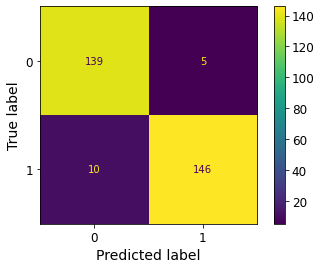

Accuratezza della LDA: 0.94


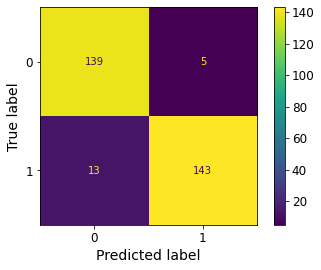

Accuratezza della QDA: 0.9433333333333334


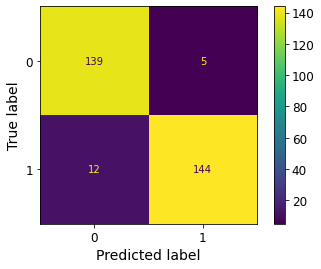

Accuratezza del Naive Bayes: 0.77


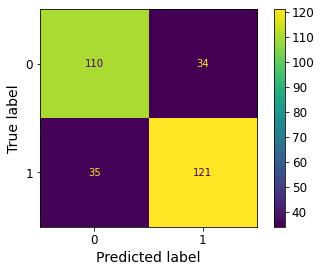

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, train_size = 0.7)
#print(y_train)
#print(y_cluster)
LDA_cluster = LDA().fit(X_train, y_train)
QDA_cluster = QDA().fit(X_train, y_train)
NB_cluster = GNB().fit(X_train, y_train)
LR_cluster = LogisticRegression(penalty=None).fit(X_train, y_train)

y_pred_lda = LDA_cluster.predict(X_test)
y_pred_qda = QDA_cluster.predict(X_test)
y_pred_nb = NB_cluster.predict(X_test)
y_pred_lr = LR_cluster.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lda = accuracy_score(y_test, y_pred_lda)
acc_qda = accuracy_score(y_test, y_pred_qda)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"Accuratezza della logistic regression: {acc_lr}")

matrix_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix = matrix_lr).plot()
plt.show()

print(f"Accuratezza della LDA: {acc_lda}")

matrix_lda = confusion_matrix(y_test, y_pred_lda)
ConfusionMatrixDisplay(confusion_matrix = matrix_lda).plot()
plt.show()

print(f"Accuratezza della QDA: {acc_qda}")

matrix_qda = confusion_matrix(y_test, y_pred_qda)
ConfusionMatrixDisplay(confusion_matrix = matrix_qda).plot()
plt.show()

print(f"Accuratezza del Naive Bayes: {acc_nb}")

matrix_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix = matrix_nb).plot()
plt.show()

## Robustezza della regressione logistica
Proviamo a cercare un dataset con degli outlier per vedere la robustezza. Prendo magari Iris dataset con i due gruppi e l'outlier lo creo io.

In [56]:
X_iris_rob = iris["data"][:, (2, 3)]  # petal length, petal width
# print(X_iris_rob)
# print(X_iris1)
y_iris_rob = (iris["target"] == 2).astype(int)  # make problem binary: 1 if Iris virginica, else 0
# y_iris_rob[-1] = 1
# y_iris_rob[-10] = 1
print(y_iris_rob)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


[[ 5.75399054 10.44602888]]
[-45.26856866]
Accuratezza della logistic regression 1: 0.9555555555555556
Accuratezza della logistic regression 2: 0.95
Accuratezza della logistic regression 3: 0.9466666666666667


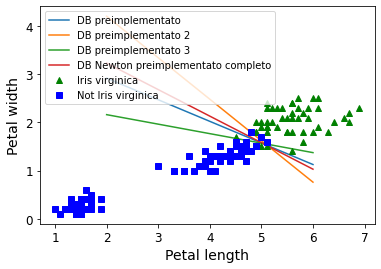

In [57]:
# X_rob = np.insert(X_iris_rob, 0, 1, axis = 1)
# print(X_rob)
# print(X4)
# beta_rob = LogisticRegressionMia2(X_rob, y_iris_rob)
# logreg_newton_iris = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_iris1, y_iris1)

#X_rob_train1, X_rob_val1, y_rob_train1, y_rob_val1 = train_test_split(X_rob, y_iris_rob, train_size = 0.7, random_state = 1)

logreg_iris_rob = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_iris_rob, y_iris_rob)

X_rob_train1, X_rob_val1, y_rob_train1, y_rob_val1 = train_test_split(X_iris_rob, y_iris_rob, train_size = 0.7, random_state = 1)

logreg_iris_rob1 = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_rob_train1, y_rob_train1)

X_rob_train2, X_rob_val2, y_rob_train2, y_rob_val2 = train_test_split(X_iris_rob, y_iris_rob, train_size = 0.6, random_state = 2)

logreg_iris_rob2 = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_rob_train2, y_rob_train2)

X_rob_train3, X_rob_val3, y_rob_train3, y_rob_val3 = train_test_split(X_iris_rob, y_iris_rob, train_size = 0.5, random_state = 5)

logreg_iris_rob3 = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_rob_train3, y_rob_train3)

print(logreg_iris_rob.coef_)
print(logreg_iris_rob.intercept_)


alpha = 0.5
log_a = np.log((alpha) /  (1 -alpha))

z_x = np.linspace(2, 6, 1000)
z_y = np.zeros_like(z_x)
z_y2 = np.zeros_like(z_x)
z_y3 = np.zeros_like(z_x)
z_rob = np.zeros_like(z_x)
z_y[:] = (log_a - logreg_iris_rob1.intercept_[0] - logreg_iris_rob1.coef_[0, 0]*z_x[:]) / (logreg_iris_rob1.coef_[0,1])

z_y2[:] = (log_a - logreg_iris_rob2.intercept_[0] - logreg_iris_rob2.coef_[0, 0]*z_x[:]) / (logreg_iris_rob2.coef_[0,1])

z_y3[:] = (log_a - logreg_iris_rob3.intercept_[0] - logreg_iris_rob3.coef_[0, 0]*z_x[:]) / (logreg_iris_rob3.coef_[0,1])

# z_y1  = (log_a - beta_rob[0] - beta_rob[1]*z_x[:]) / beta_rob[2]

z_rob = (log_a - logreg_iris_rob.intercept_[0] - logreg_iris_rob.coef_[0, 0]*z_x[:]) / (logreg_iris_rob.coef_[0,1])

# z_y_iris = (log_a - logreg_newton_iris.intercept_[0] - logreg_newton_iris.coef_[0, 0]*z_x[:]) / (logreg_newton_iris.coef_[0,1])


# Predizioni
y_pred_1 = logreg_iris_rob1.predict(X_rob_val1)
y_pred_2 = logreg_iris_rob2.predict(X_rob_val2)
y_pred_3 = logreg_iris_rob3.predict(X_rob_val3)

acc_1 = accuracy_score(y_rob_val1, y_pred_1)
acc_2 = accuracy_score(y_rob_val2, y_pred_2)
acc_3 = accuracy_score(y_rob_val3, y_pred_3)

print(f"Accuratezza della logistic regression 1: {acc_1}")
print(f"Accuratezza della logistic regression 2: {acc_2}")
print(f"Accuratezza della logistic regression 3: {acc_3}")


plt.figure()
plt.plot(z_x, z_y, label = "DB preimplementato")
plt.plot(z_x, z_y2, label = "DB preimplementato 2")
plt.plot(z_x, z_y3, label = "DB preimplementato 3")
# plt.plot(z_x, z_y1, label = "DB2 col mio codice")
plt.plot(z_x, z_rob, label = "DB Newton preimplementato completo")
plt.plot(X_iris_rob[:, 0][y_iris_rob == 1], X_iris_rob[:, 1][y_iris_rob == 1], "g^", label="Iris virginica")
plt.plot(X_iris_rob[:, 0][y_iris_rob == 0], X_iris_rob[:, 1][y_iris_rob == 0], "bs", label="Not Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.show()

In [58]:
def confronta_soglie(X_input, y_input, minval = -2, maxval = 2):
    
    logreg_base = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_input, y_input)
    
    X_train1, X_val1, y_train1, y_val1 = train_test_split(X_input, y_input, train_size = 0.7, random_state = 1)
    logreg1 = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_train1, y_train1)
    
    X_train2, X_val2, y_train2, y_val2 = train_test_split(X_input, y_input, train_size = 0.6, random_state = 2)
    logreg2 = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_train2, y_train2)
    
    X_train3, X_val3, y_train3, y_val3 = train_test_split(X_input, y_input, train_size = 0.5, random_state = 3)
    logreg3 = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_train3, y_train3)
    
    LDA_base = LDA().fit(X_input, y_input)
    QDA_base = QDA().fit(X_input, y_input)
    NB_base = GNB().fit(X_input, y_input)
    
    LDA1 = LDA().fit(X_train1, y_train1)
    QDA1 = QDA().fit(X_train1, y_train1)
    NB1 = GNB().fit(X_train1, y_train1)
    
    LDA2 = LDA().fit(X_train2, y_train2)
    QDA2 = QDA().fit(X_train2, y_train2)
    NB2 = GNB().fit(X_train2, y_train2)
    
    LDA3 = LDA().fit(X_train3, y_train3)
    QDA3 = QDA().fit(X_train3, y_train3)
    NB3 = GNB().fit(X_train3, y_train3)
    
    # Predizioni
    y_pred = logreg_base.predict(X_input)
    y_pred_1 = logreg1.predict(X_val1)
    y_pred_2 = logreg2.predict(X_val2)
    y_pred_3 = logreg3.predict(X_val3)
    
    y_pred_lda = LDA_base.predict(X_input)
    y_pred_lda1 = LDA1.predict(X_val1)
    y_pred_lda2 = LDA2.predict(X_val2)
    y_pred_lda3 = LDA3.predict(X_val3)
    
    y_pred_qda = QDA_base.predict(X_input)
    y_pred_qda1 = QDA1.predict(X_val1)
    y_pred_qda2 = QDA2.predict(X_val2)
    y_pred_qda3 = QDA3.predict(X_val3)
    
    y_pred_nb = NB_base.predict(X_input)
    y_pred_nb1 = NB1.predict(X_val1)
    y_pred_nb2 = NB2.predict(X_val2)
    y_pred_nb3 = NB3.predict(X_val3)
    
    # Accuratezze
    
    acc = accuracy_score(y_input, y_pred)
    acc_1 = accuracy_score(y_val1, y_pred_1)
    acc_2 = accuracy_score(y_val2, y_pred_2)
    acc_3 = accuracy_score(y_val3, y_pred_3)
    
    acc_lda = accuracy_score(y_input, y_pred_lda)
    acc_lda1 = accuracy_score(y_val1, y_pred_lda1)
    acc_lda2 = accuracy_score(y_val2, y_pred_lda2)
    acc_lda3 = accuracy_score(y_val3, y_pred_lda3)
    
    acc_qda = accuracy_score(y_input, y_pred_qda)
    acc_qda1 = accuracy_score(y_val1, y_pred_qda1)
    acc_qda2 = accuracy_score(y_val2, y_pred_qda2)
    acc_qda3 = accuracy_score(y_val3, y_pred_qda3)
    
    acc_nb = accuracy_score(y_input, y_pred_nb)
    acc_nb1 = accuracy_score(y_val1, y_pred_nb1)
    acc_nb2 = accuracy_score(y_val2, y_pred_nb2)
    acc_nb3 = accuracy_score(y_val3, y_pred_nb3)
    
    print(f"Accuratezza della logistic regression: {acc}")
    print(f"Accuratezza della logistic regression 1: {acc_1}")
    print(f"Accuratezza della logistic regression 2: {acc_2}")
    print(f"Accuratezza della logistic regression 3: {acc_3}")
    
    print(f"Accuratezza della LDA base: {acc_lda}")
    print(f"Accuratezza della LDA 1: {acc_lda1}")
    print(f"Accuratezza della LDA 2: {acc_lda2}")
    print(f"Accuratezza della LDA 3: {acc_lda3}")
    
    print(f"Accuratezza della QDA base: {acc_qda}")
    print(f"Accuratezza della QDA 1: {acc_qda1}")
    print(f"Accuratezza della QDA 2: {acc_qda2}")
    print(f"Accuratezza della QDA 3: {acc_qda3}")
    
    print(f"Accuratezza della NB base: {acc_nb}")
    print(f"Accuratezza della NB 1: {acc_nb1}")
    print(f"Accuratezza della NB 2: {acc_nb2}")
    print(f"Accuratezza della NB 3: {acc_nb3}")
    
    # Disegni
    
    alpha = 0.5
    log_a = np.log((alpha) /  (1 -alpha))

    z_x = np.linspace(minval, maxval, 1000)
    z_y = np.zeros_like(z_x)
    z_y1 = np.zeros_like(z_x)
    z_y2 = np.zeros_like(z_x)
    z_y3 = np.zeros_like(z_x)
    z_y[:] = (log_a - logreg_base.intercept_[0] - logreg_base.coef_[0, 0]*z_x[:]) / (logreg_base.coef_[0,1])
    z_y1[:] = (log_a - logreg1.intercept_[0] - logreg1.coef_[0, 0]*z_x[:]) / (logreg1.coef_[0,1])
    z_y2[:] = (log_a - logreg2.intercept_[0] - logreg2.coef_[0, 0]*z_x[:]) / (logreg2.coef_[0,1])
    z_y3[:] = (log_a - logreg3.intercept_[0] - logreg3.coef_[0, 0]*z_x[:]) / (logreg3.coef_[0,1])
    
    plt.figure()
    plt.figure(figsize=(8, 8))
    plt.plot(z_x, z_y, label = "DB base")
    plt.plot(z_x, z_y1, label = "DB 1")
    plt.plot(z_x, z_y2, label = "DB 2")
    plt.plot(z_x, z_y3, label = "DB 3")
    plt.plot(X_input[:, 0][y_input == 1], X_input[:, 1][y_input == 1], "g^", label="Classe 1")
    plt.plot(X_input[:, 0][y_input == 0], X_input[:, 1][y_input == 0], "bs", label="Classe 2")
    plt.xlabel("Feature 1", fontsize=14)
    plt.ylabel("Feature 2", fontsize=14)
    plt.legend(loc="upper left", fontsize=10)
    plt.show()


Accuratezza della logistic regression: 0.937
Accuratezza della logistic regression 1: 0.9266666666666666
Accuratezza della logistic regression 2: 0.9475
Accuratezza della logistic regression 3: 0.93
Accuratezza della LDA base: 0.934
Accuratezza della LDA 1: 0.9266666666666666
Accuratezza della LDA 2: 0.945
Accuratezza della LDA 3: 0.928
Accuratezza della QDA base: 0.937
Accuratezza della QDA 1: 0.93
Accuratezza della QDA 2: 0.95
Accuratezza della QDA 3: 0.93
Accuratezza della NB base: 0.792
Accuratezza della NB 1: 0.7533333333333333
Accuratezza della NB 2: 0.795
Accuratezza della NB 3: 0.796


<Figure size 432x288 with 0 Axes>

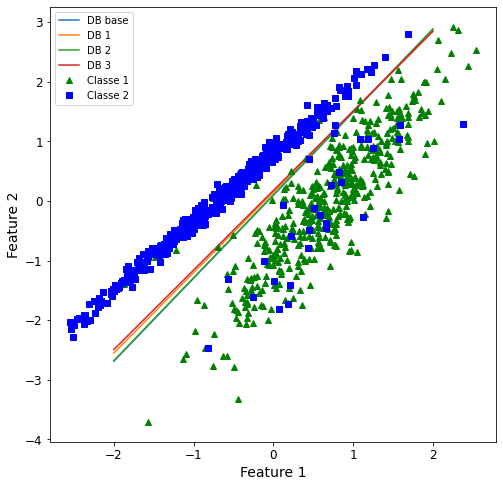

In [59]:
confronta_soglie(X_cluster, y_cluster)

Accuratezza della logistic regression: 0.867
Accuratezza della logistic regression 1: 0.8766666666666667
Accuratezza della logistic regression 2: 0.88
Accuratezza della logistic regression 3: 0.872
Accuratezza della LDA base: 0.869
Accuratezza della LDA 1: 0.8833333333333333
Accuratezza della LDA 2: 0.885
Accuratezza della LDA 3: 0.87
Accuratezza della QDA base: 0.868
Accuratezza della QDA 1: 0.8833333333333333
Accuratezza della QDA 2: 0.885
Accuratezza della QDA 3: 0.87
Accuratezza della NB base: 0.868
Accuratezza della NB 1: 0.8833333333333333
Accuratezza della NB 2: 0.885
Accuratezza della NB 3: 0.87


<Figure size 432x288 with 0 Axes>

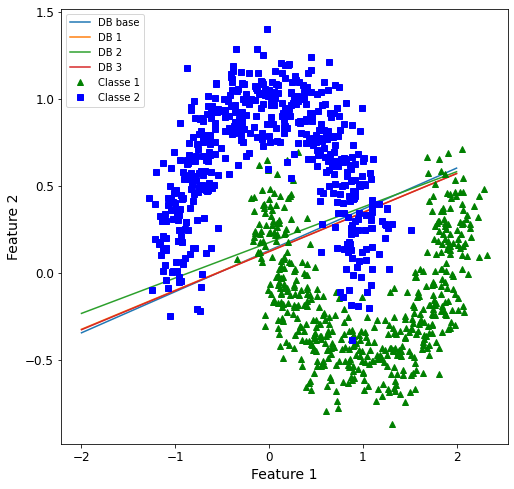

In [60]:
confronta_soglie(X_moon, y_moon)

Accuratezza della logistic regression: 0.51
Accuratezza della logistic regression 1: 0.36666666666666664
Accuratezza della logistic regression 2: 0.45
Accuratezza della logistic regression 3: 0.46
Accuratezza della LDA base: 0.51
Accuratezza della LDA 1: 0.36666666666666664
Accuratezza della LDA 2: 0.45
Accuratezza della LDA 3: 0.46
Accuratezza della QDA base: 0.94
Accuratezza della QDA 1: 0.4666666666666667
Accuratezza della QDA 2: 0.575
Accuratezza della QDA 3: 0.66
Accuratezza della NB base: 0.96
Accuratezza della NB 1: 0.43333333333333335
Accuratezza della NB 2: 0.6
Accuratezza della NB 3: 0.64


<Figure size 432x288 with 0 Axes>

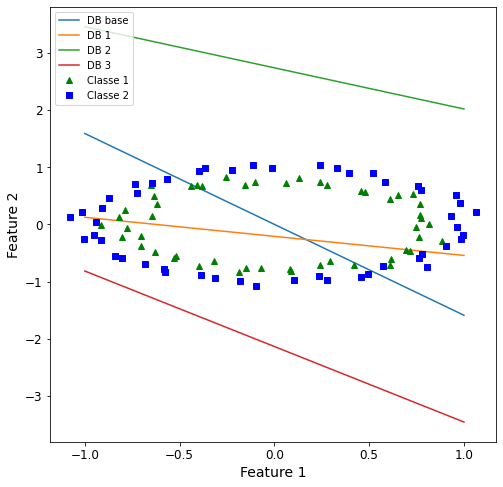

In [61]:
confronta_soglie(X, y, minval = -1, maxval = 1)

Cosa succede se applico la LDA e così via a un caso in cui non ho separazione lineare? Magari funziona meglio...

In [62]:
X_iris_rob1 = iris["data"][:, (2, 3)]  # petal length, petal width
# print(X_iris_rob)
# print(X_iris1)
y_iris_rob1 = (iris["target"] == 0).astype(int)  # make problem binary: 1 if Iris virginica, else 0
y_iris_rob1[-1] = 1
# y_iris_rob[-10] = 1
print(y_iris_rob1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1]


Accuratezza della logistic regression: 0.9933333333333333
Accuratezza della logistic regression 1: 0.9777777777777777
Accuratezza della logistic regression 2: 1.0
Accuratezza della logistic regression 3: 0.9866666666666667
Accuratezza della LDA base: 0.9866666666666667
Accuratezza della LDA 1: 0.9777777777777777
Accuratezza della LDA 2: 1.0
Accuratezza della LDA 3: 0.9866666666666667
Accuratezza della QDA base: 0.9933333333333333
Accuratezza della QDA 1: 1.0
Accuratezza della QDA 2: 1.0
Accuratezza della QDA 3: 1.0
Accuratezza della NB base: 0.9933333333333333
Accuratezza della NB 1: 1.0
Accuratezza della NB 2: 1.0
Accuratezza della NB 3: 1.0


<Figure size 432x288 with 0 Axes>

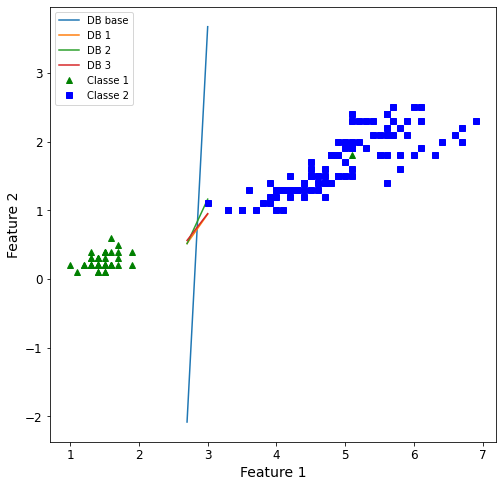

In [63]:
confronta_soglie(X_iris_rob1, y_iris_rob1, minval = 2.7, maxval = 3)

In [64]:
from ISLP import load_data

In [65]:
default = load_data('Default')
default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


<Figure size 432x288 with 0 Axes>

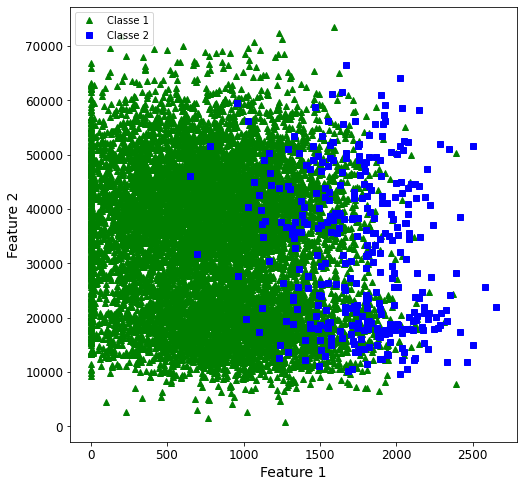

In [66]:
default
#X_def = default.loc[:, ("balance", "income")]
def_array = default.values
X_def = def_array[:, (2, 3)]
y_def = (def_array[:, 0] == 'No').astype(int)

plt.figure()
plt.figure(figsize=(8, 8))
plt.plot(X_def[:, 0][y_def == 1], X_def[:, 1][y_def == 1], "g^", label="Classe 1")
plt.plot(X_def[:, 0][y_def == 0], X_def[:, 1][y_def == 0], "bs", label="Classe 2")
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.show()

In [67]:
X_def_train, X_def_val, y_def_train, y_def_val = train_test_split(X_def, y_def, train_size = 0.7)

logreg_def = LogisticRegression(penalty = None, solver = 'newton-cholesky').fit(X_def_train, y_def_train)
y_def_pred = logreg_def.predict(X_def_val)
print(logreg_def.intercept_)
print(logreg_def.coef_)

accuracy_score(y_def_val, y_def_pred)

[11.66476321]
[[-5.79969180e-03 -1.88793523e-05]]


0.9733333333333334

## Prova con più classi per cercare instabilità
Vogliamo cercare un esempio che mi porti a instabilità nei risultati. Proviamo con Iris Dataset a vedere se c'è qualcosa di utile nel predirre le 3 classi interamente. Il seguente non sembra molto utile.

0.9833333333333333


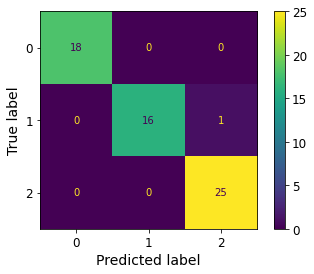

In [70]:
X_iris, y_iris = iris.data, iris.target
X_iris1 = iris["data"][:, (2, 3)]  # petal length, petal width

X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_iris, y_iris, train_size = 0.6)

logreg_multi = LogisticRegression(penalty = None).fit(X_multi_train, y_multi_train)
y_multi_pred = logreg_multi.predict(X_multi_test)
print(accuracy_score(y_multi_test, y_multi_pred))
matrix_multi = confusion_matrix(y_multi_test, y_multi_pred)
ConfusionMatrixDisplay(confusion_matrix = matrix_multi).plot()
plt.show()